In [0]:
#https://www.youtube.com/watch?v=SEQbb8w7VTw
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Loading data
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
#Storing the data
AAPL = pd.read_csv('AAPL.csv')
#Show the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


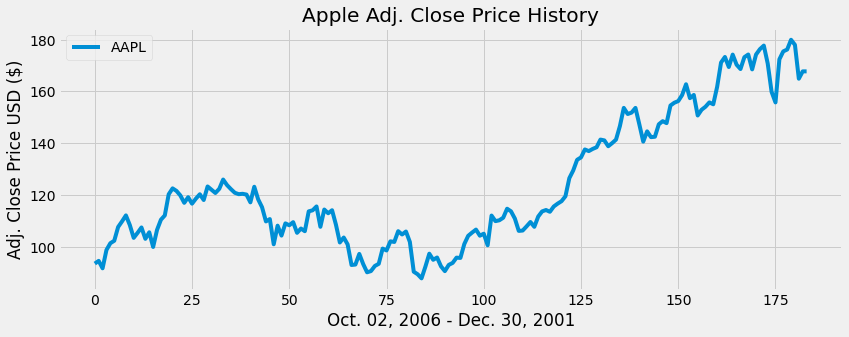

In [5]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2001')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Create simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,166.220082
180,166.944129
181,167.154109
182,167.320155


In [7]:
#Create simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window= 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,133.802447
180,134.523642
181,135.154237
182,135.928340


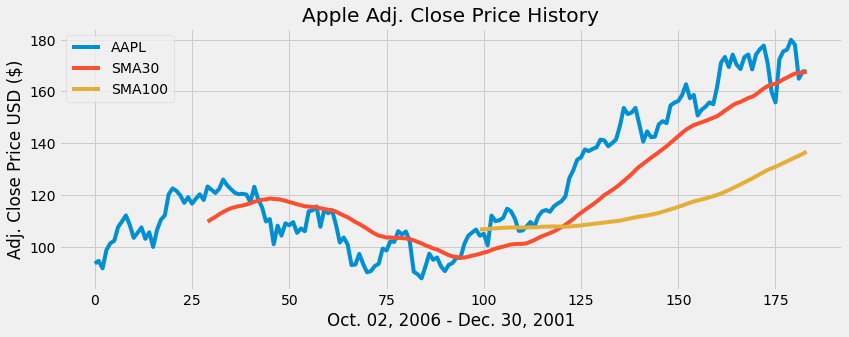

In [8]:
#Visualizing the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
#Creating new dataframe to store all data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,166.220082,133.802447
180,178.020004,166.944129,134.523642
181,164.940002,167.154109,135.154237
182,167.779999,167.320155,135.928340


In [0]:
#Creating a function that signals when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [0]:
#Storing thwe buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[0]

In [18]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,NaN,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,166.220082,133.802447,NaN,NaN
180,178.020004,166.944129,134.523642,NaN,NaN
181,164.940002,167.154109,135.154237,NaN,NaN
182,167.779999,167.320155,135.928340,NaN,NaN


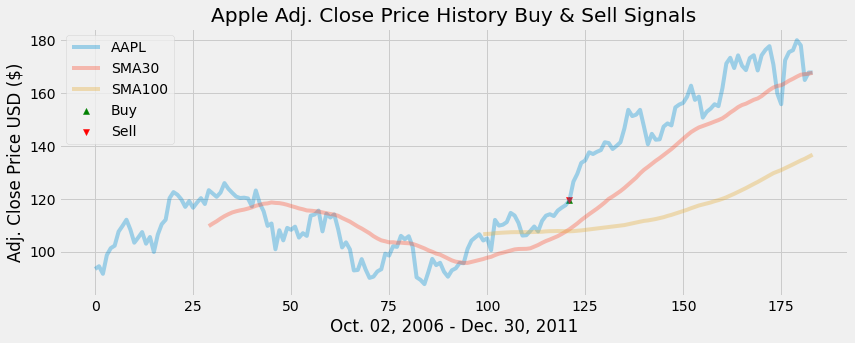

In [19]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color ='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color ='red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()